# Fundamentos de computación cuántica

A lo largo de este notebook de python, se presentan las aplicaciones e implementaciones de las bases de la computación cuántica desarrolladas en la memoria.

Antes de empezar, es necesario la descarga e importación de las siguientes librerias:

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import Aer
import matplotlib.pyplot as plt

### Qubits

Se construye un circuito de 3 qubits, donde cada qubit representa un estado diferente. El qubit 0 representa el ket 0, el qubit 1 el ket 1 y el qubit 2 un estado de superposición. La representación se hace por una esfera de Bloch.


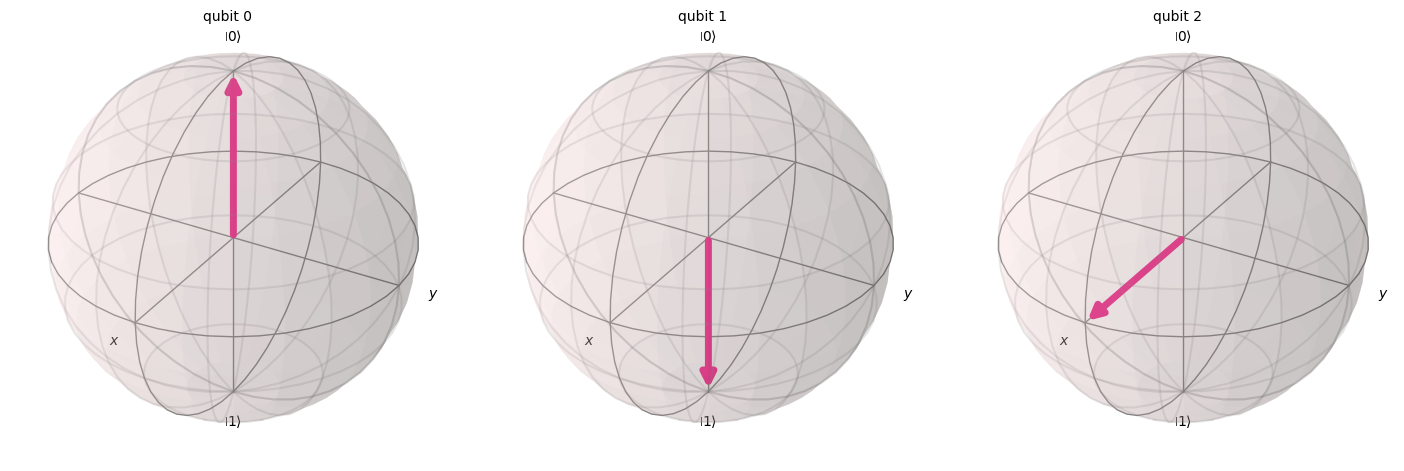

In [ ]:
qc = QuantumCircuit(3) # Circuito de 3 qubits

# Todos los qubits se inicializan en |0>
qc.x(1) # Aplicar una compuerta X al segundo qubit para conseguir el estado |1>
qc.h(2) # Aplicar una compuerta Hadamard al tercer qubit para conseguir una superposición


#Esfera de Bloch para visualizar los estados de cada qubit
backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)


También se puede representar las probabilidades de colapsar a cada estado con un diagrama de barras.

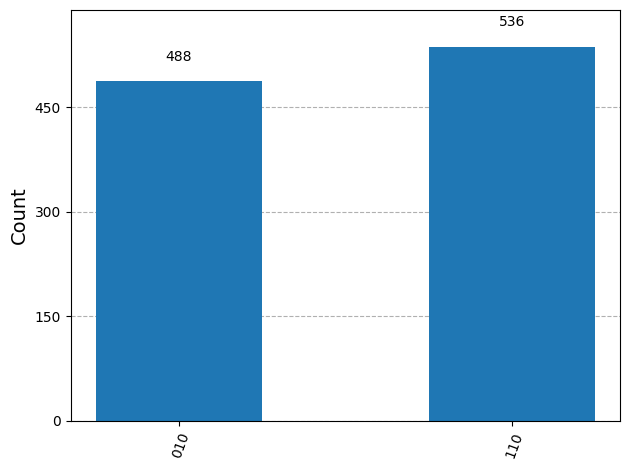

In [6]:
qc = QuantumCircuit(3)

qc.x(1)
qc.h(2)

qc.measure_all()

#Histograma de resultados
out = Aer.get_backend('qasm_simulator').run(transpile(qc, Aer.get_backend('qasm_simulator'))).result().get_counts()
plot_histogram(out)

### Puertas cuánticas

#### Puertas de Pauli

In [10]:
# Creamos un circuito de 3 qubits para aplicar puertas X, Y y Z a cada uno de ellos
qc = QuantumCircuit(3)

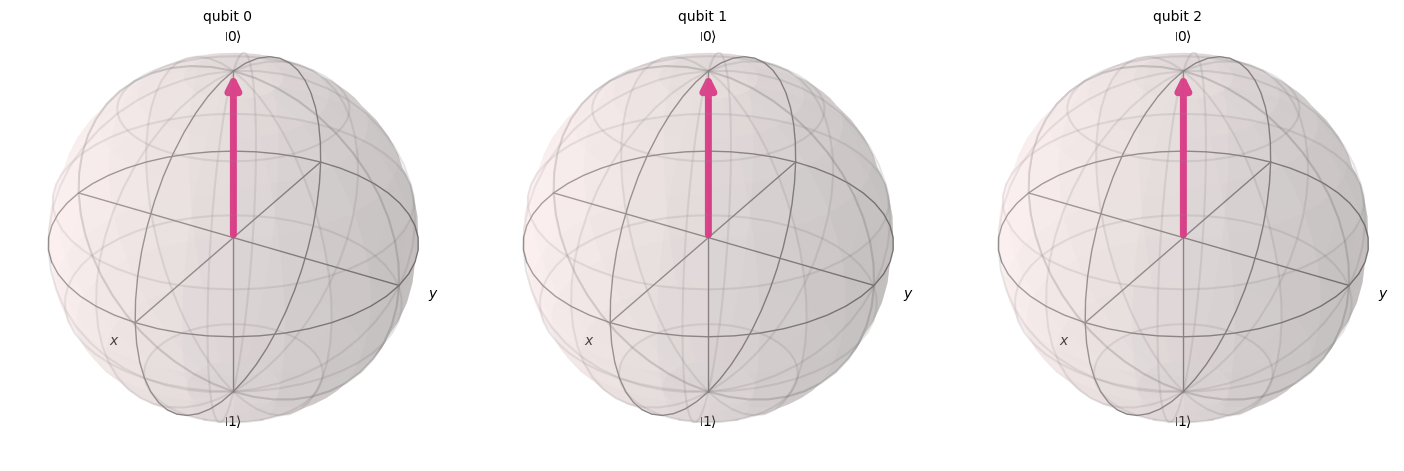

In [11]:
# Mostramos la esfera de Bloch para cada qubit en su estado inicial
backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

In [ ]:
qc.x(0) #Aplicamos la puerta X al qubit 0
qc.y(1) #Aplicamos la puerta Y al qubit 1
qc.z(2) #Aplicamos la puerta Z al qubit 2

#Visualizamos el circuito
qc.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ Y ├
     ├───┤
q_2: ┤ Z ├
     └───┘

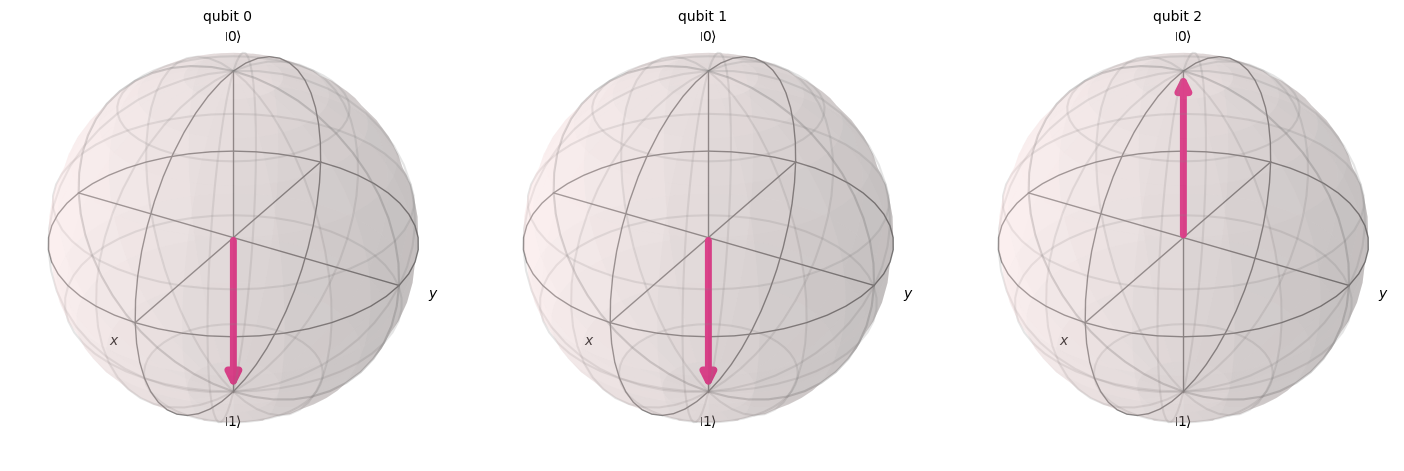

In [9]:
# Mostramos la esfera de Bloch para cada qubit
backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

#### Puerta Hadamard

In [14]:
qc = QuantumCircuit(1)

qc.h(0) #Aplicamos la puerta Hadamard al qubit 0

#Visualizamos el circuito
qc.draw()

┌───┐
q: ┤ H ├
   └───┘

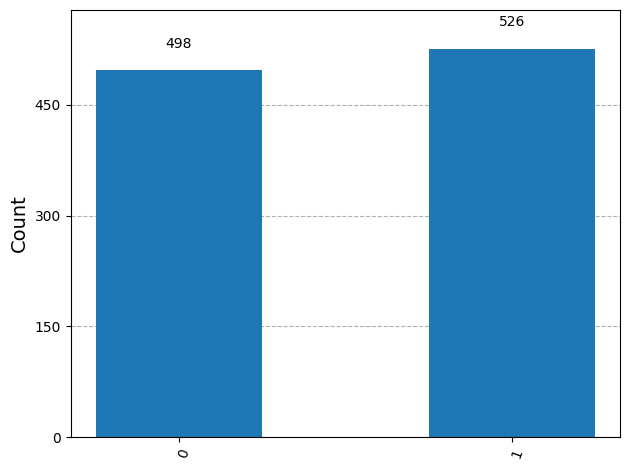

In [ ]:
# Mostramos histograma de probabilidades
backend = Aer.get_backend('qasm_simulator')
result = backend.run(transpile(qc, backend)).result()
counts = result.get_counts()
plot_histogram(counts)

#### Puerta CNOT

In [14]:
qc = QuantumCircuit(2)

qc.cx(0,1) #Aplicamos la puerta CNOT con el qubit 0 como control y el qubit 1 como objetivo

qc.cx(1,0) #Aplicamos la puerta CNOT con el qubit 1 como control y el qubit 0 como objetivo

#Visualizamos el circuito
qc.draw()

┌───┐
q_0: ──■──┤ X ├
     ┌─┴─┐└─┬─┘
q_1: ┤ X ├──■──
     └───┘

Estado de entrelazamiento

In [17]:
qc = QuantumCircuit(2)

qc.h(0) #Aplicamos la puerta Hadamard al qubit 0
qc.cx(0,1) #Aplicamos la puerta CNOT con el qubit 0 como control y el qubit 1 como objetivo

#Visualizamos el circuito
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

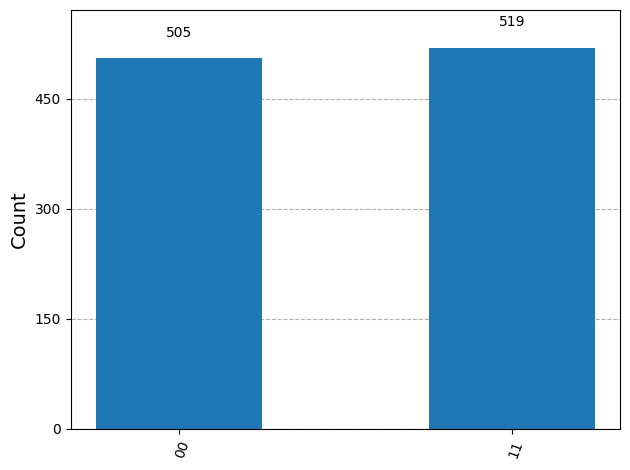

In [19]:
# Mostramos las probabilidades de medir el estado |00> y |11>
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
result = backend.run(transpile(qc, backend)).result()
counts = result.get_counts()
plot_histogram(counts)


#### QTF

In [3]:
import numpy as np

def qft(circuit, n):
    for i in range(n):
       circuit.h(i)
    for j in range(i+1, n):
        angle = np.pi / 2**(j - i)
        circuit.cp(angle, j, i)
    # Invertimos el orden de los qubits
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)

qc = QuantumCircuit(3)
qc.x(0)  # Estado inicial: |001⟩
qft(qc, 3)
qc.draw()

┌───┐┌───┐   
q_0: ┤ X ├┤ H ├─X─
     ├───┤└───┘ │ 
q_1: ┤ H ├──────┼─
     ├───┤      │ 
q_2: ┤ H ├──────X─
     └───┘